# Advanced Machine Learning @ UDD
### Instructor: Visiting Professor Rossano Schifanella

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

## Load the iris data

In [33]:
from sklearn.datasets import load_iris
# from sklearn.datasets import load_breast_cancer
# from sklearn.datasets import load_wine

iris = load_iris()

X, y = iris.data, iris.target

## Holdout Validation 

In [34]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123)



Print the class proportions for the holdout split

In [35]:
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [30.83333333 36.66666667 32.5       ]
Test: [43.33333333 20.         36.66666667]


Especially for relatively small datasets, it's better to stratify the split. Stratification means that we maintain the original class proportion of the dataset in the test and training sets. For example, after we randomly split the dataset as shown in the previous code example, we have the following class proportions in percent:

So, in order to stratify the split, we can pass the label array as an additional option to the `train_test_split` function:

In [36]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


## Import k-NN and DecisionTree classifiers

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Create a classifier and fit the data 

In [38]:
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predict

In [39]:
pred_y = tree.predict(test_X)

## Evaluate 

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [41]:
# using the score function in each model class
print("accuracy on the test set", tree.score(test_X, test_y))
print("accuracy on the training set", tree.score(train_X, train_y))

# using single metric functions in the sklearn.metrics package 
print("accuracy on the test set", accuracy_score(pred_y, test_y))

accuracy on the test set 0.8333333333333334
accuracy on the training set 1.0
accuracy on the test set 0.8333333333333334


In [42]:
confusion_matrix(test_y, pred_y)

array([[10,  0,  0],
       [ 0,  7,  3],
       [ 0,  2,  8]])

A plot is sometimes more readable:

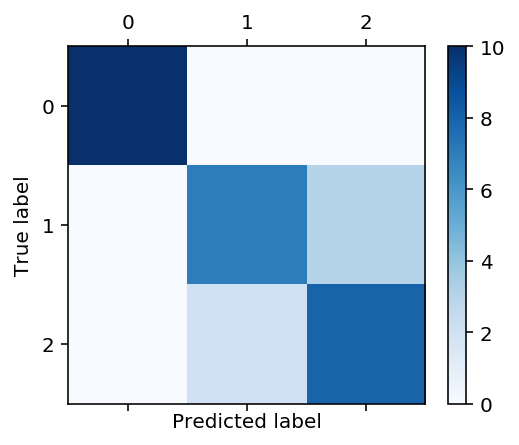

In [43]:
plt.matshow(confusion_matrix(test_y, pred_y), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel("Predicted label")
plt.ylabel("True label");

Another useful function is the ``classification_report`` which provides precision, recall, fscore and support for all classes.
Precision is how many of the predictions for a class are actually that class. With TP, FP, TN, FN standing for "true positive", "false positive", "true negative" and "false negative" repectively:

Precision = TP / (TP + FP)

Recall is how many of the true positives were recovered:

Recall = TP / (TP + FN)

F1-score is the geometric average of precision and recall:

F1 = 2 x (precision x recall) / (precision + recall)

The values of all these values above are in the closed interval [0, 1], where 1 means a perfect score.

In [44]:
# The reported averages are a prevalence-weighted macro-average across classes 
# (equivalent to precision_recall_fscore_support with average='weighted').

print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      0.70      0.74        10
           2       0.73      0.80      0.76        10

   micro avg       0.83      0.83      0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



These metrics are helpful in two particular cases that come up often in practice:
1. Imbalanced classes, that is one class might be much more frequent than the other.
2. Asymmetric costs, that is one kind of error is much more "costly" than the other.

## Validation Curve

In [46]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1,11,1)

train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, "max_depth", 
                                             param_range, cv=10)

print("scores on training set\n", train_scores)
print("scores on testing set\n", test_scores)

scores on training set
 [[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667]
 [0.95555556 0.96296296 0.95555556 0.96296296 0.96296296 0.97037037
  0.97037037 0.95555556 0.95555556 0.95555556]
 [0.97037037 0.97777778 0.97037037 0.97777778 0.97777778 0.98518519
  0.97777778 0.97037037 0.97037037 0.97037037]
 [0.97777778 0.99259259 0.99259259 0.99259259 0.99259259 1.
  1.         0.99259259 0.99259259 0.99259259]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1

## Plot a validation curve (advanced)

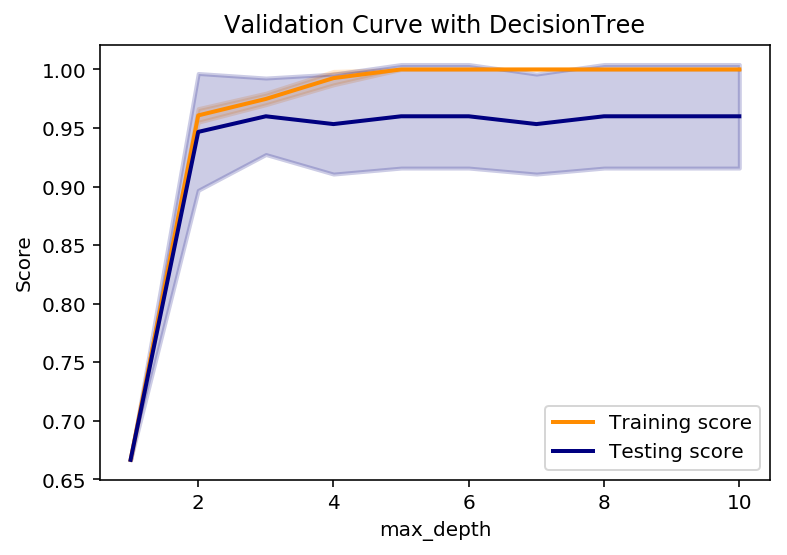

In [47]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with DecisionTree")
plt.xlabel("max_depth")
plt.ylabel("Score")
# plt.ylim(0.0, 1.1)
lw = 2

plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Testing score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Plotting a Learning Curve (advanced)

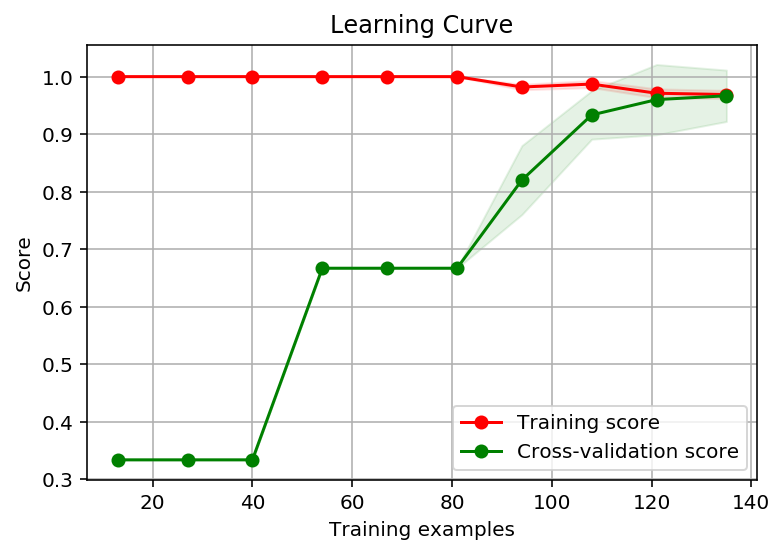

In [48]:
from sklearn.model_selection import learning_curve

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(), X, y, cv=10, train_sizes=np.linspace(.1, 1, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

## K-Fold Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

# Valid options are for the scorring attribute are 
# ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 
# 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 
# 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 
# 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 
# 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 
# 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 
# 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']

scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
print("scores: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



scores:  [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
Accuracy: 0.95 (+/- 0.09)


# Visualizing classification errors

We can also visualize the correct and wrong predictions

In [50]:
print('Samples correctly classified:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

Samples correctly classified:
[ 0  1  2  3  4  5  6  9 10 12 13 14 16 17 18 19 20 21 23 24 25 26 27 28
 29]

Samples incorrectly classified:
[ 7  8 11 15 22]


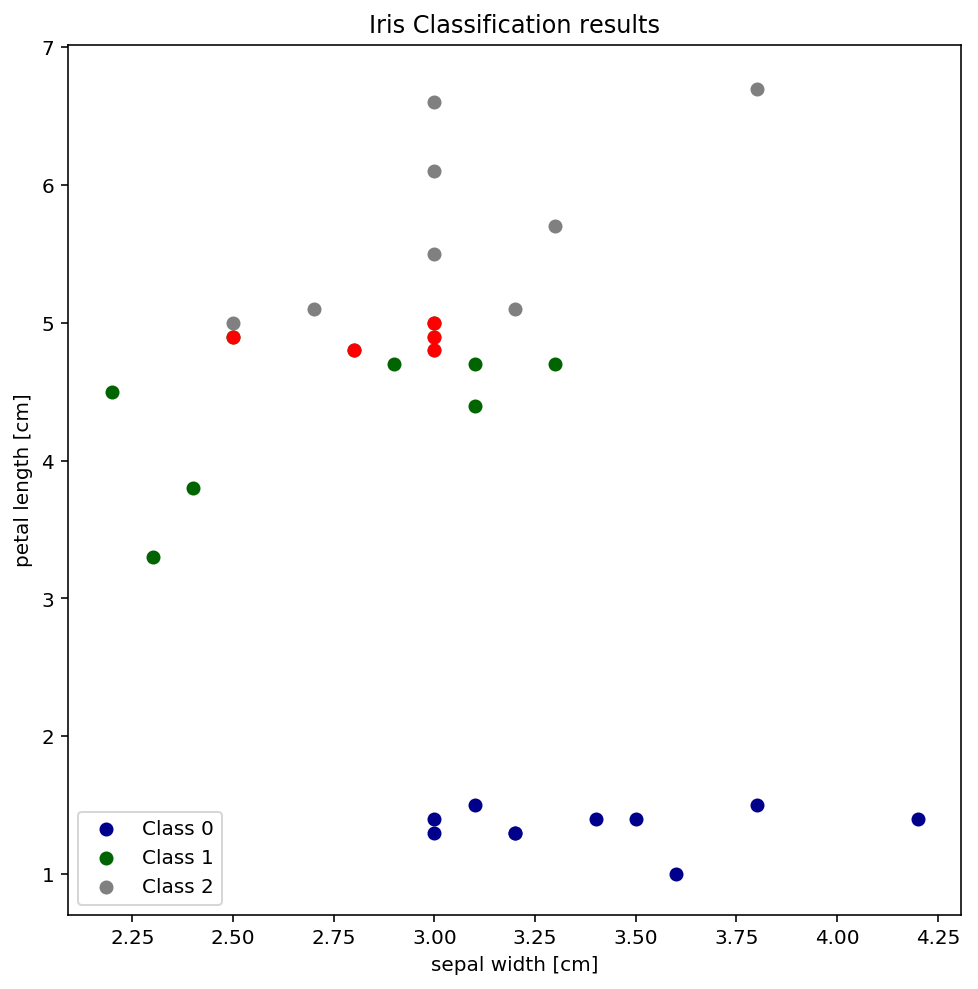

In [54]:
# Plot two dimensions

colors = ["darkblue", "darkgreen", "gray"]

plt.figure(figsize=(8,8))

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], color=color, label="Class %s" % str(n))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="red")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Print the true labels of 3 wrong predictions and modify the scatterplot code, which we used above, to visualize and distinguish these three samples with different markers in the 2D scatterplot. Can you explain why our classifier made these wrong predictions?
      </li>
    </ul>
</div>

In [20]:
# %load solutions/04_wrong-predictions.py

## Hyperparameters Optimization

### Using scikit-learn GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

# we provide a grid of hyperparameters to illustrate the point:

param_grid = {'max_depth': range(1,30,2), 'min_impurity_decrease':np.arange(0.05,0.4,0.05)}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, verbose=1,
                          return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(test_X, test_y)))

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test set score: 0.89
Best parameters: {'max_depth': 3, 'min_impurity_decrease': 0.05}
Best cross-validation score: 0.96
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.05, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy on the testing set: 0.9000


[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:    1.0s finished
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
